First we will start with importing our dataset.
It is a dataset of students and we will have to create an automated model to predict the students's performance.

In [1]:
import pandas as pd
import numpy as np

Importing DATASET:

In [2]:
raw_df = pd.read_csv('student_data.csv')
raw_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


So from here we can see that, we have 33 columns of data having school, sex and etc.
from this data, our main output to be predicted should be G3 using all the data.
so G3 is out target and others should be our input sets.



first lets check if there are any NULL VALUES in the data


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

so good thing is there are no null values. well that's a relief. lets get some more info about our data now


In [4]:
raw_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


well clearly a problematic thing here is we have too many parameters upon whuch things might depend upon. with data visualization we need to get more confident in which parameters contribute the most in a student getting a certain score in Grade 3 or G3.

for that purpose we will import data visualization libraries


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

[]

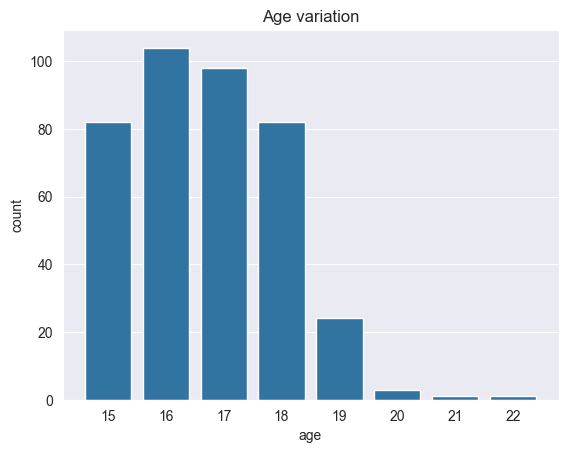

In [6]:
sns.countplot(x= raw_df.age, data = raw_df)
plt.title("Age variation")
plt.plot()

so we can see how much our age is spread all over the data.

Let us first also separate the numeric columns with the categorical columns

In [7]:

numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes('object').columns.tolist()

print(numeric_cols)
print(categorical_cols)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


now we can apply correlation on the numeric columns to understand which parameter affects most. although its not totally accurate but it will give us a slight idea about what all could affect what.


In [8]:
correlation_matrix = raw_df[numeric_cols].corr()
raw_df[numeric_cols].corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


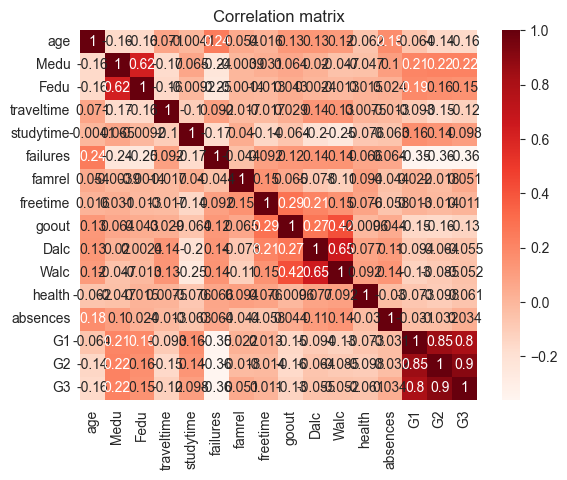

In [9]:
sns.heatmap(raw_df[numeric_cols].corr(), cmap='Reds', annot=True)
plt.title("Correlation matrix")
plt.show()

with this we can observe a basic idea that in the numeric data, G3 is affected most by G1 & G2 followed up by failures, Medu, Fedu, age, traveltime, goout. 



alright, lets now visualize it all to get a better idea


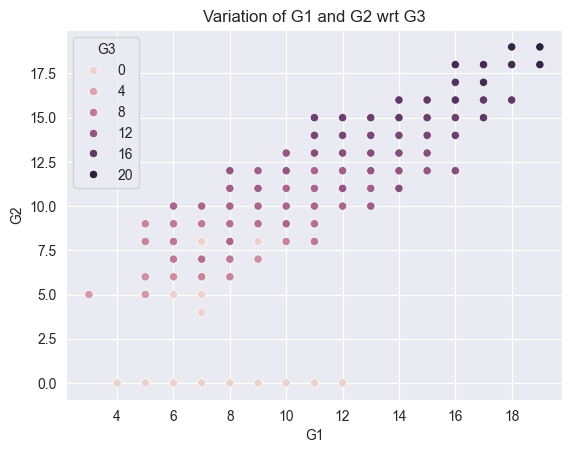

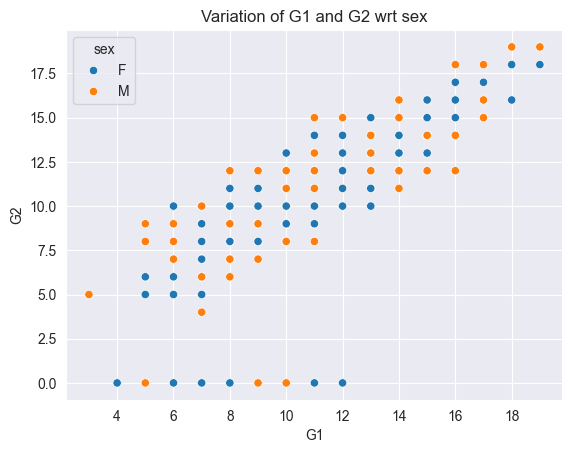

In [10]:
sns.scatterplot(x=raw_df.G1, y = raw_df.G2, data = raw_df, hue=raw_df.G3)
plt.title("Variation of G1 and G2 wrt G3")
plt.show()

sns.scatterplot(x=raw_df.G1, y = raw_df.G2, data = raw_df, hue=raw_df.sex)
plt.title("Variation of G1 and G2 wrt sex")
plt.show()

we also need to convert the categorical columns into numerics to finally understand how and on what factors our data depends the most


for example lets first take all the columns with only YES and NOs. 

for this we use .map(dictionary) to map over a categorical column

In [11]:
schoolsup_values = { 'no': 0, 'yes': 1}
schoolsup_numeric = raw_df.schoolsup.map(schoolsup_values)
print(raw_df.G3.corr(schoolsup_numeric))

famsup_values = { 'no': 0, 'yes': 1}
famsup_numeric = raw_df.famsup.map(famsup_values)
print(raw_df.G3.corr(famsup_numeric))

paid_values = { 'no': 0, 'yes': 1}
paid_numeric = raw_df.paid.map(paid_values)
print(raw_df.G3.corr(paid_numeric))

activities_values = { 'no': 0, 'yes': 1}
activities_numeric = raw_df.activities.map(activities_values)
print(raw_df.G3.corr(activities_numeric))

nursery_values = { 'no': 0, 'yes': 1}
nursery_numeric = raw_df.nursery.map(nursery_values)
print(raw_df.G3.corr(nursery_numeric))

higher_values = { 'no': 0, 'yes': 1}
higher_numeric = raw_df.higher.map(higher_values)
print(raw_df.G3.corr(higher_numeric))

internet_values = { 'no': 0, 'yes': 1}
internet_numeric = raw_df.internet.map(internet_values)
print(raw_df.G3.corr(internet_numeric))

romantic_values = { 'no': 0, 'yes': 1}
romantic_numeric = raw_df.romantic.map(romantic_values)
print(raw_df.G3.corr(romantic_numeric))


-0.08278821499316322
-0.03915714523790466
0.10199624071669916
0.01609970129581438
0.051567900910917557
0.18246461785815776
0.09848337126072909
-0.12996995016344987


we can see they dont affect much significatly here


so its safe to assume that G1 and G2 are the ones that affect our prediction of G3 deeply


we can also see that the correlation of G1 and G2 to G3 is somewhat close to 1, so we can apply a linear regression model here, since we also see a linearly increasing trend in variation of G1 and G2 wrt G3

END OF EXPLORATORY DATA ANALYSIS

MODEL : LINEAR REGRESSION 

we know G1 & G3 has most influence, so lets first start with eatimating G3 using G1.

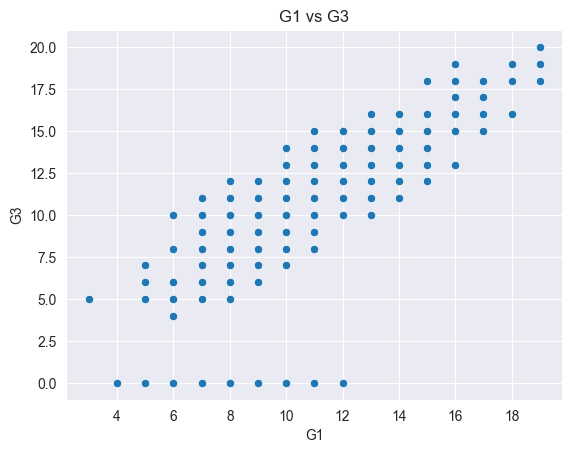

In [12]:
sns.scatterplot(x = raw_df.G1, y = raw_df.G3, data=raw_df)
plt.title("G1 vs G3")
plt.show()

Apart from a few exceptions, the points seem to form a line. So we will try to 'fit' a line into the scatterplot using these points and use this line to make our predictions

we will assume, (w = weight , b = bias)

G3 = w x G1 + b

we will try to determine the value of w and b that best fits our data. This will be the base of our Linear regression model



lets first define a function namely estimate_grade that would help us estimate G3 if given values of G1, w and b

In [13]:
def estimate_grade(G1, w, b):
    return w*G1 + b

this serves as our very first and most basic(although pretty inaccurate) ML model. lets try feeding random some inputs

In [14]:
w = 5
b = 1
Grade1 = raw_df.G1
estimated_grade = estimate_grade(Grade1, w, b)

lets plot it now


<Axes: xlabel='G1', ylabel='G1'>

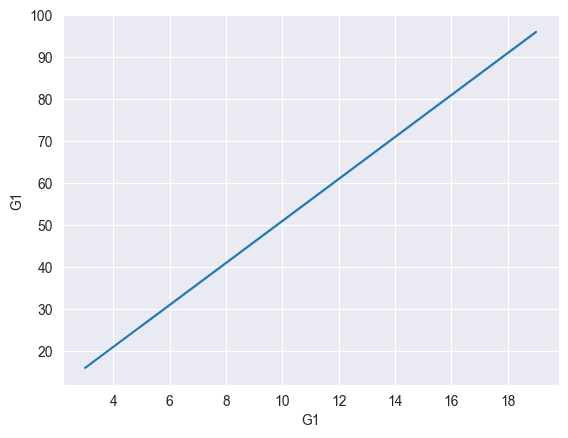

In [15]:
sns.lineplot(x = raw_df.G1, y = estimated_grade)

as expected this is a straight line. Let's overlay it in our scatterplot to catch how close we are

<Axes: xlabel='G1', ylabel='G3'>

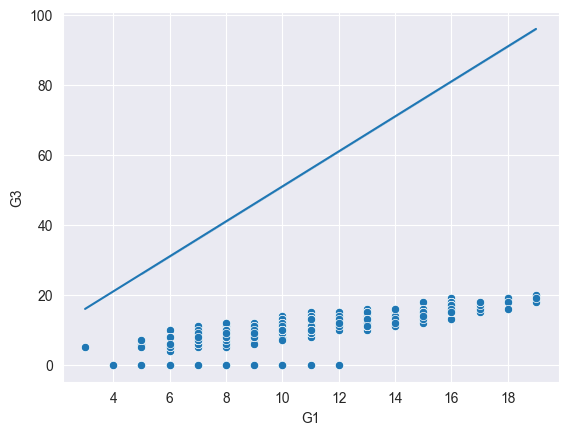

In [16]:
sns.scatterplot(x = raw_df.G1, y = raw_df.G3, data=raw_df)
sns.lineplot(x = raw_df.G1, y = estimated_grade)


well well well! we are way off. 

clearly our model gives very poor predictions. we need to optimize it better. lets make a function try_parameter on which we will feed values of w and b to check fiting


In [17]:
def try_parameter(w,b):
    inputs = raw_df.G1
    targets = raw_df.G3

    estimated_grade = estimate_grade(inputs, w, b)

    sns.scatterplot(x = inputs, y = targets)
    sns.lineplot(x = inputs, y = estimated_grade)
    plt.legend(['Actual', 'Estimate'])

    

now lets try values of w and b

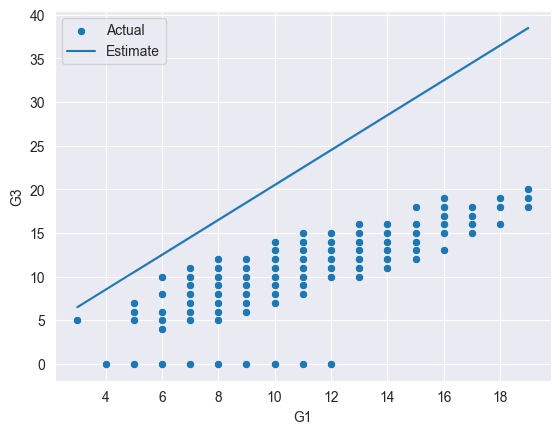

In [18]:
try_parameter(2, 0.5)

closer!! demn


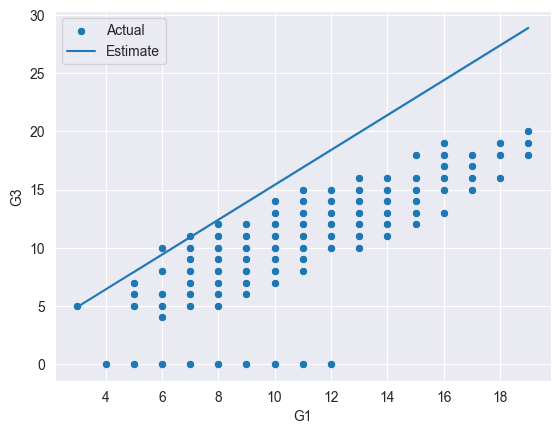

In [19]:
try_parameter(1.5, 0.4)

even closerr!! nice. 

as we are changing values of w and b, we are learning the relationship between G1 and G3 . so we can learn the pattern / recognize it by trying multiple values of w and b, and hence eventually we'll reach to the line that is best fitted

But manually i dont think we can ever optimise the line to best fit the data. for things like this we need to first answer two questions:

1) we need a way to measure numerically how well the parameters fit the data

2) once the 'measure of fit' is calculated, we need a way to improve w and b to improve the fit.

both of these questions can be answered by including a loss function in our data. For this data, we are going to use RMSE(or root mean square error).

In [20]:
def rmse(targets, predictions):
    x = np.sqrt(np.mean(np.square(targets - predictions)))
    return(x.item())

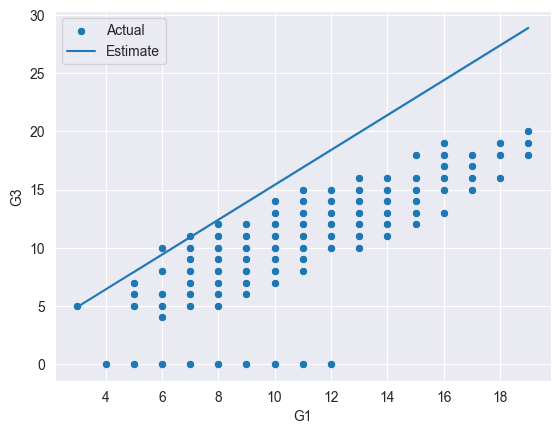

In [21]:
try_parameter(1.5, 0.4)

In [22]:
targets = raw_df.G3
predictions = estimated_grade
rmse(targets, predictions)

47.018445074408724

so 47.019....  which basically means our every prediction is roughly off by 47. 


we now need a strategy to reduce our loss and improve the fit by getting better values of w and b.

to minimise the loss we have :
1) Ordinary least square method
2) gradiesnt descent method

well we have scikit learn in python so we dont need to apply these mathematical functions manually.

so lets start using scikit learn

In [23]:
from sklearn.linear_model import LinearRegression

Now we create a new model

In [24]:
model  = LinearRegression()

now we can use the fit methof of the model to find the best fitting line

In [25]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



so from help, we see that X has to be a 2D array of training data. alright so we will need to creat a dataframe

and Y has to be an array

and it finally return the trained model itselt (self)

In [26]:
inputs = raw_df[['G1']]
targets = raw_df.G3
print(inputs.shape)
print(targets.shape)

(395, 1)
(395,)


alright so we have inputs --> X as a 2D array and Y---> as an array

lets fit our model

In [27]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Linear Regression !!


now let's predict our inputs

In [28]:
predictions = model.predict(inputs)

In [29]:
rmse(targets, predictions)

2.7364052494659816

from 47 to 2.736, see our model has become quite accurate now. 

now lets check about the parameters and see the plot


In [30]:
parameter_w = model.coef_
parameter_b = model.intercept_

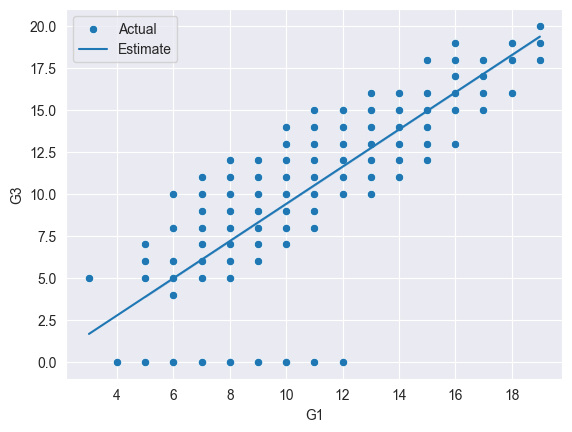

In [31]:
try_parameter(parameter_w, parameter_b)

now that's a very good fit considering from where we started at first

but but but, we have only used G1 till now for predictions, we need to add more inputs in order to reduce the loss more and enhance predictions

all we need to do is change it all slightly

now, 

G3 = w1 x G1 + w2 x G2 + b



In [32]:
inputs = raw_df[['G1', 'G2']]
targets = raw_df.G3

model.fit(inputs, targets)

predictions = model.predict(inputs)

rmse(targets, predictions)

1.9295791189095124

well our loss gets reduced even more

lets now add all of our numeric columns in our model

In [ ]:
inputs = raw_df[['G1', 'G2', 'absences', 'health', 'Walc', 'Dalc', 'goout', 'freetime', 'famrel', 'studytime', 'traveltime', 'Fedu', 'Medu', 'age']]
targets = raw_df.G3

model.fit(inputs, targets)

predictions = model.predict(inputs)

rmse(targets, predictions)

1.8488760504871729

our loss didn't reduce much. That's because the parameters we used had very weak correaltion with G3 and hence it does'nt change much.

now to improve the model even more, we need to include the categorical data into model's input too. For which we first need to convert categorical data into numerical data.

This can be done in 3 ways depending upon the columns:

1) if its a binary column( has only yes & no) we can replace the values with 1 and 0.

2) if the categorical columns has more than 2 categories, we can perform one-hot encoding i.e creating new columns for each category and filling them with 1s and 0s.

3) if the categories have a natural order (ex - cold, neutral, warm , hot), they can be converted into numbers (ex - 1,2,3,4) preserving their natural order. These are called ORDINALS


First lets deal with the binary data

we've already created the mapping of the binary columns, now lets create new columns that will consist of codes of those columns

In [34]:
raw_df['schoolsup_code'] = raw_df.schoolsup.map(schoolsup_values)

In [35]:
raw_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,schoolsup_code
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0


as we can see, we now have a new column namely "schoolsup_code" which is just a binary numeric representation of the categorical column 'schoolsup'.

we should apply this over all the binary categorical columns now.

In [36]:
raw_df['famsup_code'] = raw_df.schoolsup.map(famsup_values)

raw_df['paid_code'] = raw_df.schoolsup.map(paid_values)

raw_df['activities_code'] = raw_df.schoolsup.map(activities_values)

raw_df['nursery_code'] = raw_df.schoolsup.map(nursery_values)

raw_df['higher_code'] = raw_df.schoolsup.map(higher_values)

raw_df['internet_code'] = raw_df.schoolsup.map(internet_values)

raw_df['romantic_code'] = raw_df.schoolsup.map(romantic_values)

raw_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G2,G3,schoolsup_code,famsup_code,paid_code,activities_code,nursery_code,higher_code,internet_code,romantic_code
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,6,1,1,1,1,1,1,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,6,0,0,0,0,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,8,10,1,1,1,1,1,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,14,15,0,0,0,0,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,10,10,0,0,0,0,0,0,0,0


Alright so now all the binary categorical columns have now been converted to columns with 0s and 1s.

onto the other categorical data now. We need to perform One-Hot-Encoding.

In [37]:
raw_df[categorical_cols].nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

all the columns have not many categories. 

Now since we've already taken care of schoolsup,famsup,paid,activities,nursery,higher, internet, romantic , we might as well drop them for now.

What we could've also done is applied one hot encoding on all the categorical data, that way we would'mt have had to deal with the binary categorical columns separately.

In [ ]:
new_raw_df = raw_df[categorical_cols].drop(columns=['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
new_raw_df.head(5)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian
0,GP,F,U,GT3,A,at_home,teacher,course,mother
1,GP,F,U,GT3,T,at_home,other,course,father
2,GP,F,U,LE3,T,at_home,other,other,mother
3,GP,F,U,GT3,T,health,services,home,mother
4,GP,F,U,GT3,T,other,other,home,father


In [66]:
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder(sparse_output=False)
encoder.fit(new_raw_df)


,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [67]:
encoded_array = encoder.fit_transform(new_raw_df)

encoded_cols = encoder.get_feature_names_out(new_raw_df.columns)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=new_raw_df.index)

In [68]:
encoded_df.head(5)

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


as it can be seen , now all of our categorical data is converted into numeric

lets now fit everything into our model.

In [75]:
x = raw_df[['G1', 'G2', 'absences', 'health', 'Walc', 'Dalc', 'goout', 'freetime', 'famrel', 'studytime', 'traveltime', 'Fedu', 'Medu', 'age','schoolsup_code','famsup_code', 'paid_code', 'activities_code', 'nursery_code', 'higher_code', 'internet_code', 'romantic_code']] 
final_df = pd.concat([x, encoded_df], axis=1)
final_df.describe()

,G1,G2,absences,health,Walc,Dalc,goout,freetime,famrel,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,5.708861,3.554430,2.291139,1.481013,3.108861,3.235443,3.944304,2.035443,...,0.549367,0.281013,0.073418,0.367089,0.275949,0.091139,0.265823,0.227848,0.691139,0.081013
std,3.319195,3.761505,8.003096,1.390303,1.287897,0.890741,1.113278,0.998862,0.896659,0.839240,...,0.498188,0.450064,0.261152,0.482622,0.447558,0.288172,0.442331,0.419976,0.462610,0.273201
min,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,9.000000,0.000000,3.000000,1.000000,1.000000,2.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,11.000000,4.000000,4.000000,2.000000,1.000000,3.000000,3.000000,4.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,13.000000,13.000000,8.000000,5.000000,3.000000,2.000000,4.000000,4.000000,5.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,19.000000,19.000000,75.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
inputs = final_df
targets = raw_df.G3

model.fit(inputs, targets)

predictions = model.predict(inputs)

rmse(targets, predictions)

1.8184216167652567

This here is our final attempt for minimissing the loss using simple methods.

It says, the prediction of our model is close, every value it predicts, roughly varies by about 1.8 from the actual data which is nice considering we started at 47.


Since we are now done with the coding part, we now have to analyse the results we got.

RESULT ANALYSIS:


1) MODEL EVALUATION INSIGHTS:
   
    a) well since we did'nt bifurcated a training , test and validation set, we cant comment upon model's overfitting or underfitting.
   
    b) We used RMSE metrics to calculate the loss, which was 1.8 meaning the predictions are off by 1.8 grade. we cant create a baseline RMSE as we did not create a train/test set.
 

In [79]:
model.coef_

array([ 0.18530535,  0.97198344,  0.04257899,  0.05541022,  0.18617829,
       -0.14678652, -0.00969789,  0.02173374,  0.38175611, -0.10698582,
        0.08126199, -0.12243397,  0.11276487, -0.20135601,  0.0569098 ,
        0.0569098 ,  0.0569098 ,  0.0569098 ,  0.0569098 ,  0.0569098 ,
        0.0569098 ,  0.0569098 , -0.28465204,  0.28465204, -0.03833853,
        0.03833853, -0.06127942,  0.06127942,  0.01208415, -0.01208415,
        0.07544053, -0.07544053,  0.00565745, -0.13781646,  0.06884139,
        0.04160637,  0.02171125, -0.02065588,  0.412763  ,  0.01242538,
       -0.3552426 , -0.04928991, -0.03120073, -0.24870992,  0.20593846,
        0.07397219, -0.05061105,  0.1372495 , -0.08663846])

hmm but we cant see which feature influenced the most. Lets make a dataframe

In [80]:
coef_df = pd.DataFrame({
    "Feature": final_df.columns, 
    "coefficient": model.coef_
})

print(coef_df.sort_values(by="coefficient", ascending=False))

              Feature  coefficient
1                  G2     0.971983
38        Fjob_health     0.412763
8              famrel     0.381756
23          school_MS     0.284652
44       reason_other     0.205938
4                Walc     0.186178
0                  G1     0.185305
47    guardian_mother     0.137250
12               Medu     0.112765
10         traveltime     0.081262
30          Pstatus_A     0.075441
45  reason_reputation     0.073972
34         Mjob_other     0.068841
27          address_U     0.061279
14     schoolsup_code     0.056910
16          paid_code     0.056910
19        higher_code     0.056910
18       nursery_code     0.056910
21      romantic_code     0.056910
15        famsup_code     0.056910
17    activities_code     0.056910
20      internet_code     0.056910
3              health     0.055410
2            absences     0.042579
35      Mjob_services     0.041606
25              sex_M     0.038339
7            freetime     0.021734
36       Mjob_teache

2) FEATURE IMPORTANCE:

    so we can see that, G3 is mostly affected by G2, followed by father's job(i.e. if he is in health there are more chances for the child to score better grades, according to the data) and family relations. Also MS is a good school that outcomes better G3 . While if father has job in services it impacts negatively

3) POSSIBLE EXTENSIONS:

    a) More models like random forst, XG boost can be applied for better results.

    b) model can be deployed as a web 